In [6]:
import jf
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.table import Table, Column
from marvin import config
import jerelh
config.setRelease('DR16')
config.setDR('DR16')
config.download = True

import random

import warnings 
warnings.filterwarnings("ignore")

In [7]:
with fits.open(
        './data/control_X2_M_z_mh.fits'
) as hdulist:
    plateifu_list = hdulist[1].data['plateifu']

In [10]:
t = jf.stat_list(plateifu_list, min_snr=2)
t

plateifu,angle,lead_area,trail_area,lead_mean,trail_mean,lead_median,trail_median,sfr,used_area,total_area,pix_used_ratio,asymmetry
str10,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
8711-9101,1,8.0,3.0,1.0856911430011188e-05,4.213911554370163e-06,5.738719627362042e-06,5.428201100239762e-06,2.4874256525799998e-05,11.0,1019.0,0.010794896957801767,--
7990-6102,1,128.0,124.0,0.0007996594791103728,0.0010242114044736019,0.0005559180674986377,0.0009178488809809531,0.05794680236421544,253.0,292.0,0.8664383561643836,0.3896268717326584
7991-12704,1,834.0,792.0,0.0014531611108282363,0.0015032746634728313,0.0010535081713653935,0.0010762366782589422,0.6018530440727163,1627.0,1707.0,0.9531341534856473,0.21280143361213572
8449-3702,1,8.0,0.0,1.3612943917671281e-05,--,1.0548496872573857e-05,--,2.7225887835342562e-05,8.0,590.0,0.013559322033898305,--
8262-6103,1,0.0,3.0,--,4.5291513046524105e-05,--,3.5626619776942794e-05,3.396863478489308e-05,3.0,459.0,0.006535947712418301,--
8947-9102,1,791.0,774.0,0.0028239575404766944,0.002422676158314537,0.0023409493669408503,0.002009638471522794,1.0272254402631291,1565.0,1621.0,0.9654534238124615,0.27816236010485196
9865-3704,1,22.0,28.0,0.0004723793089215433,0.002207961236005056,9.451676611717027e-05,0.0004059177242644476,0.01805381485110388,50.0,295.0,0.1694915254237288,0.8972140559768573
8465-6103,1,210.0,136.0,0.0022998247381734067,0.0031019525317818623,0.00044996198466410267,0.0005193805626060083,0.23656666267365534,347.0,636.0,0.5455974842767296,0.2503284892617766
8450-1902,1,67.0,67.0,0.01815385594246311,0.01647878838865879,0.015521167485972558,0.011925254302765115,0.593828274498094,135.0,135.0,1.0,0.10808687845742194


In [11]:
t.write('./stat/control_stat_5_18.fits', format='fits')

In [9]:
mask = t['l_area']>25
t=t[mask]
mask = t['t_area']>25
t=t[mask]

In [77]:
col_ratio = Column(name='ratio', data=(t['l_area']-t['t_area'])/(t['l_area']+t['t_area']))
t.replace_column('ratio',col_ratio)

In [78]:
col_ratio = Column(name='ratio', data=(t_ha['l_area']-t_ha['t_area'])/(t_ha['l_area']+t_ha['t_area']))
t_ha.replace_column('ratio',col_ratio)

In [79]:
jelly = Table.read('./stat/stat_sfr.fits')
asy_c = t['asy']
asy_ha = t_ha['asy']
asy_j = jelly['asy']

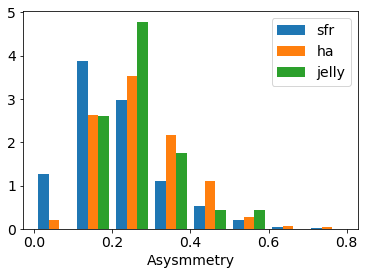

In [80]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
plt.hist([asy_ha,asy_c],density=True,bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],label=['sfr','ha'])
ax = plt.gca()
ax.set_xlabel('Asysmmetry')
ax.legend()
ax.tick_params(labelsize=14)

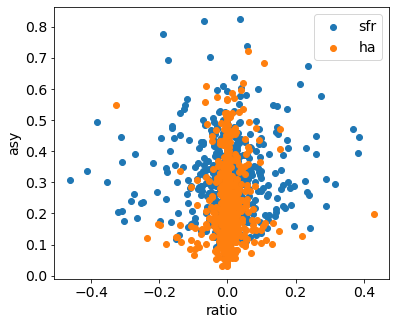

In [81]:
r_c = t['ratio']
r_ha = t_ha['ratio']
plt.scatter(r_c, asy_c, label='sfr')
plt.scatter(r_ha, asy_ha, label='ha')
ax =plt.gca()
ax.legend()
ax.set_xlabel('ratio')
ax.set_ylabel('asy')
fig = plt.gcf()
fig.set_figheight(5)

In [82]:
print(np.mean(abs(r_c)))
print(np.mean(abs(r_ha)))

0.04285447896426018
0.017738876541004096


Text(0, 0.5, 'asy')

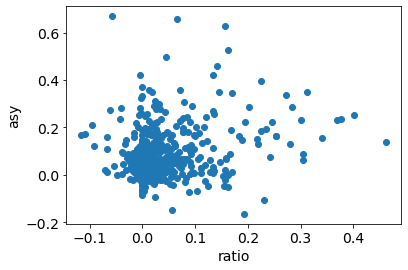

In [89]:
plt.scatter(abs(r_c)-abs(r_ha),asy_c-asy_ha)
ax = plt.gca()
ax.set_xlabel('ratio')
ax.set_ylabel('asy')

In [91]:
t_ha.remove_column('col13')

In [6]:
t.write(')
t_ha.write('./stat/control_4_30_ha.fits')

SyntaxError: EOL while scanning string literal (<ipython-input-6-29c69c021748>, line 1)

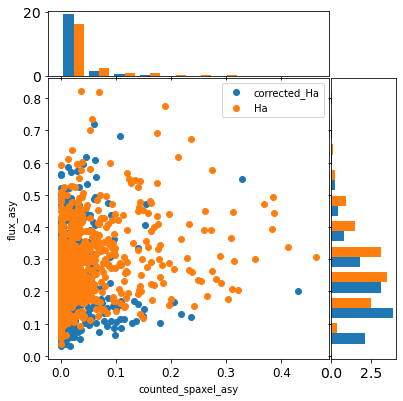

In [4]:
t = Table.read('./stat/control_4_30_sfr.fits')
t_ha = Table.read('./stat/control_4_30_ha.fits')
# definitions for the axes
left, width = 0.15, 0.65
bottom, height = 0.15, 0.65
spacing = 0.005
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.15]
rect_histy = [left + width + spacing, bottom, 0.15, height]

# start with a square Figure
fig = plt.figure(figsize=(6, 6))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

x = np.abs(t['ratio'])
y = t['asy']
i = np.abs(t_ha['ratio'])
j = t_ha['asy']

ax.scatter(i, j, label='corrected_Ha')
ax.scatter(x, y, label='Ha')
#ax.legend()
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)
ax_histx.tick_params(axis="y", labelsize=14)
ax_histy.tick_params(axis="x", labelsize=14)

ax.tick_params(labelsize=12)
ax.set_xlabel('counted_spaxel_asy')
ax.set_ylabel('flux_asy')

ax_histx.hist([i, x], density=True)
ax_histy.hist([j, y], orientation='horizontal', density=True)
ax.legend()
#ax.vlines(0, -0.9, 0.9, colors="black", linestyles="dashed")
#ax.hlines(0, -0.9, 0.9, colors="black", linestyles="dashed")

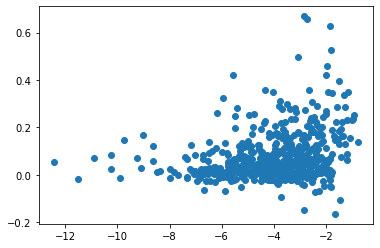

In [8]:
plt.scatter(np.log(abs(x-i)),y-j)

In [15]:
np.argmax(y-j)
t[560]

num,ifu_id,d_angle,l_area,t_area,l_sum,t_sum,l_error,t_error,l_median,t_median,asy,ratio
int64,bytes11,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64
689,8952-6102,0,29,27,0.008321847235811157,0.059883442065115124,0.00010365459308871374,0.0018165244389260237,0.004973443516703227,0.00742167867256937,0.823185044542173,0.03571428571428571


In [17]:
dif = t_ha['l_area']+t_ha['t_area']-t['l_area']-t['t_area']

In [18]:
np.mean(dif)

79.44582814445828

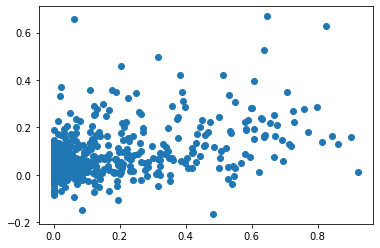

In [20]:
plt.scatter(dif/(t_ha['l_area']+t_ha['t_area']),t['asy']-t_ha['asy'])

In [16]:
area = np.zeros(803)
for i in range(803):
    area[i] = jerel.total_area(plateifu=t['ifu_id'][i])

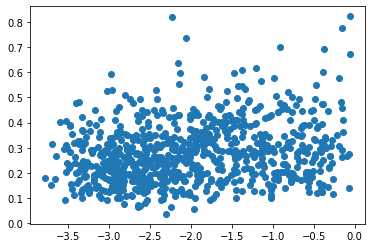

In [19]:
sfr_area = t['l_area']+t['t_area']
plt.scatter(np.log(1-sfr_area/area),t['asy'])

In [24]:
t['ifu_id'][0]

'7990-6102'

In [5]:
t['asy']-t_ha['asy']

0.24563646299028935
0.035060841163265966
0.03747072400031187
0.13165506993002962
0.001913959447159233
0.1080637450889192
0.01088919898625823
0.0650181130521188
0.042213534593460805
0.0437053656508532
0.027584433875686487


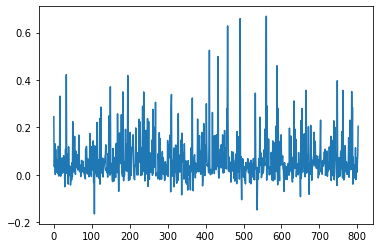

In [6]:
plt.plot(t['asy']-t_ha['asy'])

In [9]:
asy_mask =  t['asy']-t_ha['asy']>0.3
t_masked = t[asy_mask]
t_ha_masked = t_ha[asy_mask]

In [14]:
Table([t_masked['ifu_id'],t_masked['asy']-t_ha_masked ['asy'],t_ha_masked['l_area']+t_ha_masked['t_area']-t_masked['l_area']-t_masked['t_area']],names=['ifu','dif','arae_dif'])

ifu,dif,arae_dif
bytes11,float64,int64
9027-1902,0.33192829513869004,2
8250-1902,0.4225487391390974,58
8449-1902,0.37130926991652097,2
8253-3702,0.3499263753315205,137
8320-1901,0.41905992216024623,109
8461-1902,0.3497362035175401,26
8341-6101,0.30619408742455323,620
8992-3701,0.3388074854747532,87
8601-1902,0.3242440413667018,37
